Импортирование библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Подключение данных

In [2]:
df = pd.read_csv('dataset.csv')
df_copy = df.copy()

In [3]:
df_copy

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Обзор данных

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

### Анализ целевой переменной

In [5]:
df_copy['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Text(0, 0.5, 'Количество студентов')

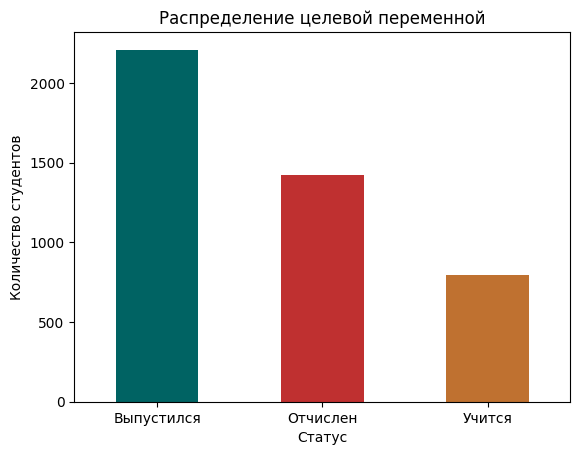

In [6]:
# Словарь русских наименований классов для визуализации
name_map = {'Dropout':'Отчислен', 'Graduate':'Выпустился', 'Enrolled':'Учится'}

# Отрисовка графика
df_copy['Target'].map(name_map).value_counts().plot(kind='bar', 
                                                    color=['#006363', '#BF3030', '#BF7130'],
                                                    rot = 0)
plt.title('Распределение целевой переменной')
plt.xlabel('Статус')
plt.ylabel('Количество студентов')

#### Анализ класса enrolled

In [7]:
# Переименование колонок для удобства
df_copy = df.rename(columns={'Curricular units 1st sem (credited)': 'Units 1 credited', 
                             'Curricular units 1st sem (enrolled)': 'Units 1 enrolled',
                             'Curricular units 1st sem (evaluations)': 'Units 1 evaluations', 
                             'Curricular units 1st sem (approved)': 'Units 1 approved', 
                             'Curricular units 1st sem (grade)': 'Units 1 grade',
                             'Curricular units 1st sem (without evaluations)': 'Units 1 non_eval', 
                             'Curricular units 2nd sem (credited)': 'Units 2 credited', 
                             'Curricular units 2nd sem (enrolled)': 'Units 2 enrolled',
                             'Curricular units 2nd sem (evaluations)': 'Units 2 evaluations', 
                             'Curricular units 2nd sem (approved)': 'Units 2 approved',
                             'Curricular units 2nd sem (grade)': 'Units 2 grade',
                             'Curricular units 2nd sem (without evaluations)': 'Units 2 non_eval'})

In [8]:
grade_columns = ['Units 1 credited', 'Units 1 enrolled', 'Units 1 evaluations', 'Units 1 approved', 
                 'Units 1 grade', 'Units 1 non_eval', 'Units 2 credited', 'Units 2 enrolled', 
                 'Units 2 evaluations', 'Units 2 approved', 'Units 2 grade', 'Units 2 non_eval']

In [9]:
# Статистика оценок первого семестра
df_copy.groupby('Target')['Units 1 grade'].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
Dropout,1421.0,7.256656,6.031120,0.0,0.000000,10.928571,12.200000,18.000
Enrolled,794.0,11.125257,3.675084,0.0,11.000000,12.000000,12.857143,17.000
Graduate,2209.0,12.643655,2.699027,0.0,12.121429,13.000000,13.857143,18.875


In [10]:
# Статистика оценок первого семестра
df_copy.groupby('Target')['Units 2 grade'].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
Dropout,1421.0,5.899339,6.118740,0.0,0.000000,0.0,11.833333,17.714286
Enrolled,794.0,11.117364,3.601240,0.0,11.000000,12.0,12.818182,17.600000
Graduate,2209.0,12.697276,2.685608,0.0,12.166667,13.0,14.000000,18.571429


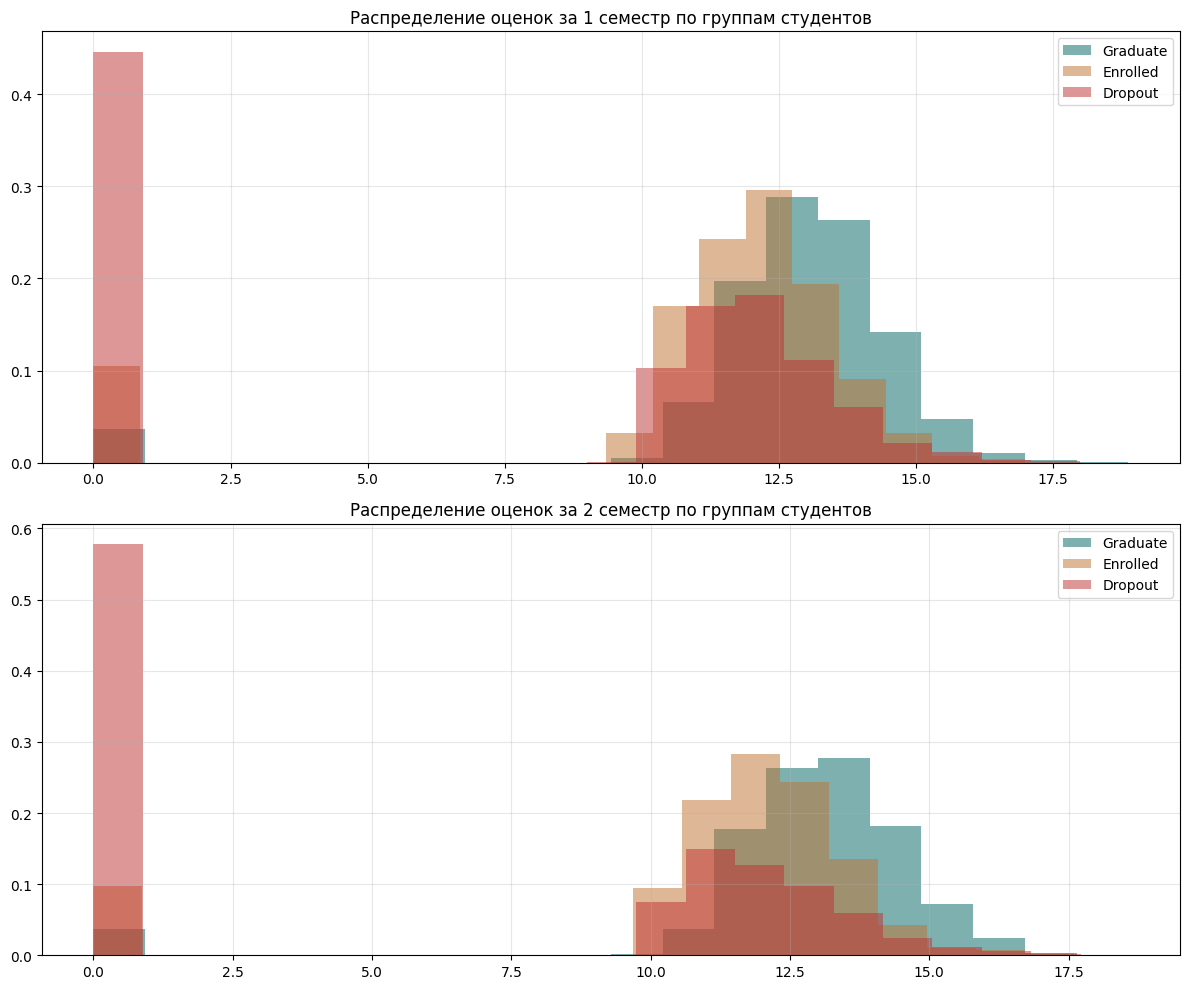

In [11]:
plt.figure(figsize=(12,10))

target = ['Graduate', 'Enrolled', 'Dropout']
color = ['#006363', '#BF7130', '#BF3030']

plt.subplot(2, 1, 1)
for a, b in zip(target, color):
    grades = df_copy[df_copy['Target'] == a]['Units 1 grade']
    plt.hist(grades, bins=20, color=b, alpha=0.5, density=1, label=a)

plt.grid(alpha=0.3)
plt.title('Распределение оценок за 1 семестр по группам студентов')
plt.legend()

plt.subplot(2, 1, 2)
for a, b in zip(target, color):
    grades = df_copy[df_copy['Target'] == a]['Units 2 grade']
    plt.hist(grades, bins=20, color=b, alpha=0.5, density=1, label=a)

plt.grid(alpha=0.3)
plt.title('Распределение оценок за 2 семестр по группам студентов')
plt.legend()
plt.tight_layout()

По статистике и графикам видно, что группа учащихся (enrolled) находится гораздо ближе к выпустившимся (graduate), чем к отчисленным (dropout). Таким образом, принято решение объединить группы учащихся и выпустившихся. Дальнейший анализ проводить по группам: отчисленные и неотчисленные. 

In [12]:
# Объединение классов и приведение к числовым значениям
target_map = {'Dropout': 1, 'Enrolled': 0, 'Graduate': 0}
df_copy['Target'] = df_copy['Target'].map(target_map)

In [13]:
# Проверка корректности класссов
df_copy['Target'].value_counts()

Target
0    3003
1    1421
Name: count, dtype: int64

In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Marital status              4424 non-null   int64  
 1   Application mode            4424 non-null   int64  
 2   Application order           4424 non-null   int64  
 3   Course                      4424 non-null   int64  
 4   Daytime/evening attendance  4424 non-null   int64  
 5   Previous qualification      4424 non-null   int64  
 6   Nacionality                 4424 non-null   int64  
 7   Mother's qualification      4424 non-null   int64  
 8   Father's qualification      4424 non-null   int64  
 9   Mother's occupation         4424 non-null   int64  
 10  Father's occupation         4424 non-null   int64  
 11  Displaced                   4424 non-null   int64  
 12  Educational special needs   4424 non-null   int64  
 13  Debtor                      4424 